<a href="https://colab.research.google.com/github/MacWorldPro/Module_34/blob/main/FE_EDA_GooglePlaystore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
# Let us first handle missing values from column Rating
df['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [8]:
df['Rating'].median()

4.3

<ipython-input-10-8611a7653425>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


<Axes: xlabel='Rating', ylabel='Density'>

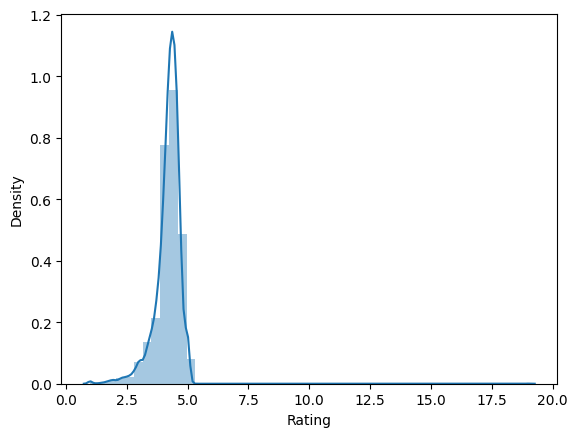

In [10]:
import seaborn as sns
sns.distplot(df['Rating'])

<Axes: ylabel='Rating'>

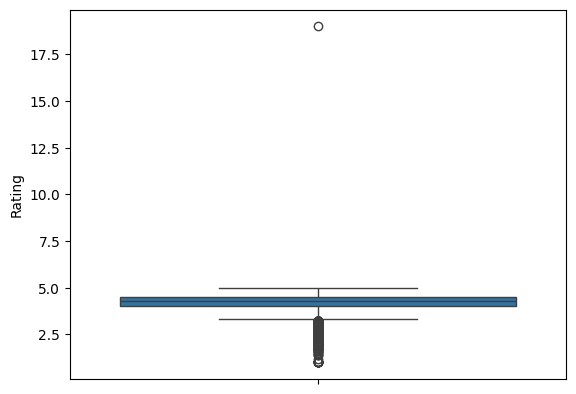

In [11]:
sns.boxplot(df['Rating'])

In [12]:
# 25%         4.000000
# 50%         4.300000
# 75%         4.500000
Q1=df['Rating'].quantile(0.25)
Q3=df['Rating'].quantile(0.75)

IQR = Q3 - Q1

# Step 5: Determine the lower bound
lower_bound = Q1 - (1.5 * IQR)

# Step 6: Determine the upper bound
upper_bound = Q3 + (1.5 * IQR)

In [20]:
df[df['Rating']>upper_bound].describe()

,Rating
count,1.0
mean,19.0
std,NaN
min,19.0
25%,19.0
50%,19.0
75%,19.0
max,19.0


In [18]:
 df[df['Rating']<lower_bound].describe()

,Rating
count,503.000000
mean,2.681909
std,0.528746
min,1.000000
25%,2.400000
50%,2.900000
75%,3.100000
max,3.200000


In [21]:
# let us handle outliers
df.loc[df['Rating'] < lower_bound, 'Rating'] = lower_bound
df.loc[df['Rating'] > upper_bound, 'Rating'] = upper_bound

In [22]:
df['Rating'].describe()

count    9367.000000
mean        4.222376
std         0.418118
min         3.250000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.250000
Name: Rating, dtype: float64

In [23]:
df['Rating'].median()

4.3

In [24]:
df['Rating'].isnull().sum()

1474

In [29]:
# Now we can handle missing values by filling in mean in column Rating
df['Rating'].fillna(df['Rating'].mean(),inplace=True)

<Axes: ylabel='Rating'>

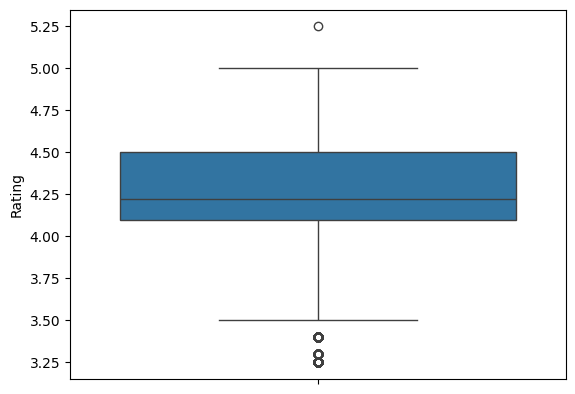

In [30]:
sns.boxplot(df['Rating'])

In [31]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [42]:
# Let us first update date to numerical values
date_list = []
for date_str in df['Last Updated']:
    try:
        date_list.append(pd.to_datetime(date_str))
    except ValueError:
        # If the parsing fails, append NaN
        date_list.append(pd.NaT)

# Add the parsed dates to the DataFrame
df['Last Updated'] = date_list

# Extract day, month, and year into separate columns
df['Updated_Day'] = df['Last Updated'].dt.day
df['Updated_Month'] = df['Last Updated'].dt.month
df['Updated_Year'] = df['Last Updated'].dt.year

KeyError: 'Last Updated'

In [40]:
df.drop(columns=['Last Updated'],inplace=True)

In [43]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15.0,1.0,2018.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Current Ver     10833 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Day             10840 non-null  float64
 13  Month           10840 non-null  float64
 14  Year            10840 non-null  float64
dtypes: float64(4), object(11)
memory usage: 1.2+ MB


In [45]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15.0,1.0,2018.0


In [46]:
# let us convert reviews, size ,installs to numerical columns,also price


In [51]:
def convert_to_int(val):
    if 'M' in val:
        return int(float(val.replace('M', '')) * 1000000)  # Convert to integer representing millions
    else:
        return int(val)

# Apply the function to each element of 'Reviews' column
df['Reviews'] = df['Reviews'].apply(convert_to_int)

In [58]:
# Let us analyse price
# Remove non-numeric values and replace '$' with an empty string
df['Price'] = df['Price'].replace('Everyone', '').str.replace('$', '')

# Convert to float
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [60]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15.0,1.0,2018.0


In [63]:
# Let us go for size column
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: count, Length: 462, dtype: int64

In [64]:
def convert_size_to_kb(size):
    try:
        if 'M' in size:
            return int(float(size.replace('M', '')) * 1000)  # Convert from megabytes to kilobytes
        elif 'k' in size:
            return int(size.replace('k', ''))  # Already in kilobytes
        else:
            return int(size.replace('M', '')) * 1000  # If size doesn't have 'M' or 'k', assume it's in megabytes
    except ValueError:
        return None  # Return None for exceptions

# Apply the function to each element of 'Size' column
df['Size'] = df['Size'].apply(convert_size_to_kb)

In [66]:
df['Size'].describe()

count      9144.000000
mean      21518.881671
std       22588.863186
min          11.000000
25%        4900.000000
50%       13000.000000
75%       30000.000000
max      100000.000000
Name: Size, dtype: float64

In [67]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15.0,1.0,2018.0


In [ ]:
# Let us try for Installs
df['Installs'].value_counts()

In [69]:
def convert_installs_to_numeric(installs):
    try:
        return int(installs.replace(',', '').replace('+', ''))
    except ValueError:
        return None  # Return None for exceptions

# Apply the function to each element of 'Installs' column
df['Installs'] = df['Installs'].apply(convert_installs_to_numeric)

In [70]:
# Let analyse Type
df['Type'].value_counts()

Type
Free    10039
Paid      800
0           1
Name: count, dtype: int64

In [71]:
# Type is imbalanced
df['Type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: Type
Non-Null Count  Dtype 
--------------  ----- 
10840 non-null  object
dtypes: object(1)
memory usage: 84.8+ KB


In [73]:
from sklearn.preprocessing import LabelEncoder

In [75]:
# Replace 'Paid' with 1 and 'Free' with 0, and remove '0'
df['Type'] = df['Type'].replace({'Free': 0, 'Paid': 1}).replace({'0': None}).dropna()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Type' column
df['Type'] = label_encoder.fit_transform(df['Type'])

In [76]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year,Type_LabelEncoded
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,0,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7.0,1.0,2018.0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,0,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15.0,1.0,2018.0,0


In [77]:
df.drop(columns=['Type'],inplace=True)

In [78]:
# Let us do for content rating
df['Content Rating'].value_counts()

Content Rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [79]:
from sklearn.preprocessing import OneHotEncoder

In [83]:
# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

# Fit and transform the 'Content Rating' column
encoded_features = one_hot_encoder.fit_transform(df[['Content Rating']])

# Extract feature names from the encoder
feature_names = one_hot_encoder.get_feature_names_out(['Content Rating'])

# Create a DataFrame with the encoded features and assign column names
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Concatenate the encoded DataFrame with the original DataFrame
df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [84]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Current Ver,...,4,5,6,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Content Rating_nan
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,0.0,Everyone,Art & Design,1.0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,0.0,Everyone,Art & Design;Pretend Play,2.0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,0.0,Everyone,Art & Design,1.2.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,0.0,Teen,Art & Design,Varies with device,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000.0,0.0,Everyone,Art & Design;Creativity,1.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [86]:
df.columns

Index([                           'App',                       'Category',
                               'Rating',                        'Reviews',
                                 'Size',                       'Installs',
                                'Price',                 'Content Rating',
                               'Genres',                    'Current Ver',
                          'Android Ver',                            'Day',
                                'Month',                           'Year',
                    'Type_LabelEncoded',                                0,
                                      1,                                2,
                                      3,                                4,
                                      5,                                6,
       'Content Rating_Adults only 18+',        'Content Rating_Everyone',
          'Content Rating_Everyone 10+',      'Content Rating_Mature 17+',
                  'Conten

In [87]:
df.drop(columns=[0,1,2,3,4,5,6],inplace=True)

In [88]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Current Ver,...,Month,Year,Type_LabelEncoded,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Content Rating_nan
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,0.0,Everyone,Art & Design,1.0.0,...,1.0,2018.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,0.0,Everyone,Art & Design;Pretend Play,2.0.0,...,1.0,2018.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [89]:
df.drop(columns=['Content Rating'],inplace=True)

In [90]:
df['Genres'].value_counts()

Genres
Tools                     842
Entertainment             623
Education                 549
Medical                   463
Business                  460
                         ... 
Arcade;Pretend Play         1
Card;Brain Games            1
Lifestyle;Pretend Play      1
Comics;Creativity           1
Strategy;Creativity         1
Name: count, Length: 120, dtype: int64

In [91]:
# It is balanced

In [92]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Day,Month,Year,Type_LabelEncoded,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Content Rating_nan
count,10841.000000,1.084100e+04,9144.000000,1.084000e+04,10840.000000,10840.000000,10840.000000,10840.000000,10841.000000,10841.000000,10841.00000,10841.000000,10841.000000,10841.000000,10841.000000,10841.000000
mean,4.222376,4.443887e+05,21518.881671,1.546434e+07,1.027368,15.609041,6.422325,2017.399723,0.074163,0.000277,0.80380,0.038188,0.046029,0.111429,0.000184,0.000092
std,0.388652,2.927728e+06,22588.863186,8.502936e+07,15.949703,9.561621,2.578388,1.100914,0.262751,0.016634,0.39714,0.191660,0.209558,0.314677,0.013582,0.009604
min,3.250000,0.000000e+00,11.000000,0.000000e+00,0.000000,1.000000,1.000000,2010.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.100000,3.800000e+01,4900.000000,1.000000e+03,0.000000,6.000000,5.000000,2017.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.222376,2.094000e+03,13000.000000,1.000000e+05,0.000000,16.000000,7.000000,2018.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.500000,5.479800e+04,30000.000000,5.000000e+06,0.000000,24.000000,8.000000,2018.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.250000,7.815831e+07,100000.000000,1.000000e+09,400.000000,31.000000,12.000000,2018.000000,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
df.select_dtypes(include='object')

,App,Category,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Art & Design;Creativity,1.1,4.4 and up
...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,Education,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,Education,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,Medical,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Books & Reference,Varies with device,Varies with device


In [99]:
df['Current Ver'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: Current Ver
Non-Null Count  Dtype 
--------------  ----- 
10833 non-null  object
dtypes: object(1)
memory usage: 84.8+ KB


<Axes: >

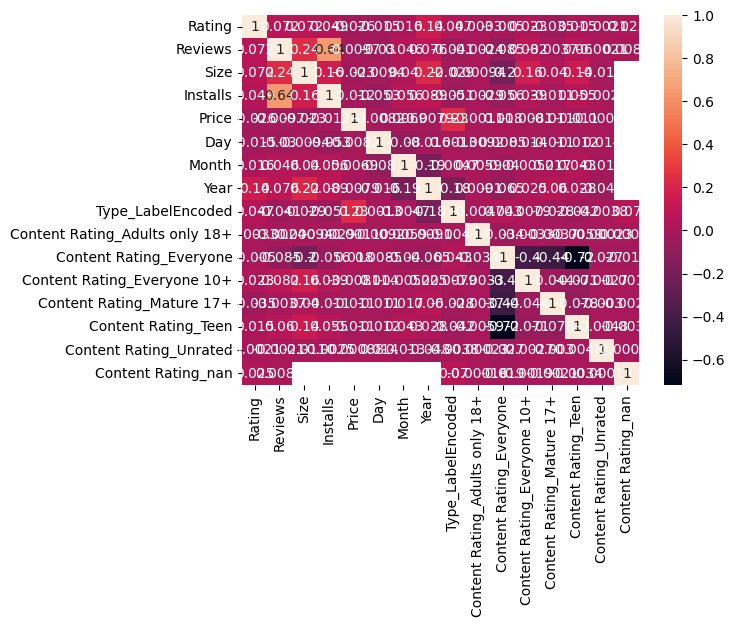

In [104]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

In [105]:
df.isnull().sum()

App                                  0
Category                             0
Rating                               0
Reviews                              0
Size                              1697
Installs                             1
Price                                1
Genres                               0
Current Ver                          8
Android Ver                          3
Day                                  1
Month                                1
Year                                 1
Type_LabelEncoded                    0
Content Rating_Adults only 18+       0
Content Rating_Everyone              0
Content Rating_Everyone 10+          0
Content Rating_Mature 17+            0
Content Rating_Teen                  0
Content Rating_Unrated               0
Content Rating_nan                   0
dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   App                             10841 non-null  object 
 1   Category                        10841 non-null  object 
 2   Rating                          10841 non-null  float64
 3   Reviews                         10841 non-null  int64  
 4   Size                            9144 non-null   float64
 5   Installs                        10840 non-null  float64
 6   Price                           10840 non-null  float64
 7   Genres                          10841 non-null  object 
 8   Current Ver                     10833 non-null  object 
 9   Android Ver                     10838 non-null  object 
 10  Day                             10840 non-null  float64
 11  Month                           10840 non-null  float64
 12  Year                            

In [115]:
numeric_columns = df.select_dtypes(include='number')
df[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())

In [118]:
object_columns = df.select_dtypes(include='object')
df[object_columns.columns] = object_columns.fillna(object_columns.mode().iloc[0])


In [119]:
df.isnull().sum()

App                               0
Category                          0
Rating                            0
Reviews                           0
Size                              0
Installs                          0
Price                             0
Genres                            0
Current Ver                       0
Android Ver                       0
Day                               0
Month                             0
Year                              0
Type_LabelEncoded                 0
Content Rating_Adults only 18+    0
Content Rating_Everyone           0
Content Rating_Everyone 10+       0
Content Rating_Mature 17+         0
Content Rating_Teen               0
Content Rating_Unrated            0
Content Rating_nan                0
dtype: int64

# Finally FE Done Almost